In [2]:
%%writefile /mnt/solexa/mel_yang/coastal_neolithic/D_Coastal_2.2M.py
import plotting_funcs as pf
#import HOdata

mypopns={}
mypopns["neas"]=["Oroqen","Hezhen","Daur","Xibo"]
mypopns["weas"]=["Yi","Naxi","Tibetan"]
mypopns["ceas"]=["Japanese","Korean","Han","Tujia","She","Miao"] 
mypopns["seas"]=["Lahu","Dai","Kinh","Ami","Atayal"]
mypopns["sasn"]=["Burmese","Thai","Cambodian"]
mypopns["feas"]=["Tu","Uygur"]
mypopns["eas"]=mypopns["neas"]+mypopns["ceas"]+mypopns["seas"]+mypopns["weas"]+mypopns["sasn"]+mypopns["feas"]
mypopns["namer"]=["Cree","Chipewyan",'Saqqaq']
mypopns["samer"]=["Clovis","Pima","Mayan","Mixe","Zapotec","Piapoco","Quechua","Nahua","Karitiana","Surui","Chane"]
mypopns["amer"]=mypopns["namer"]+mypopns["samer"]
mypopns["fsib"]=["Aleut","Tlingit","Mansi","Chukchi","Tubalar","Kyrgyz"]
mypopns["wsib"]=["Ulchi","Mongola","Altaian","Even","Yakut"]
mypopns["esib"]=["Itelman","Eskimo_Sireniki","Eskimo_Naukan","Eskimo_Chaplin"]
mypopns["sib"]=mypopns["wsib"]+mypopns["esib"]+mypopns["fsib"]
mypopns["pac"]=["Onge","Papuan","Maori","Igorot","Hawaiian","Dusun","Bougainville","Australian"]
mypopns["others"]=["Sherpa","Kusunda","Saami"]

eas=mypopns["eas"]
sib=mypopns["sib"]

ancasn=["Tianyuan",'Longlin','Longlin_com','Xinyi','Xinyi_other','Daxi',
        'LiangDaoChineseNeolithic','Boisman_MN','BoshanChineseNeolithic',
        'Bbdong','Linzi','HDYM1','HQSDW','Zongri','Pukagongma']
aneas=['Boisman_MN','BoshanChineseNeolithic','Bbdong','Linzi','HDYM1','HQSDW',"DevilsGate","Jomon"]
aseas=['Xinyi','Xinyi_other','Daxi','LiangDaoChineseNeolithic']
aweas=['Zongri','Pukagongma','Chokhopani1','Mebrak','Samdzong']

pD="/mnt/solexa/mel_yang/data/2.2M/"
outpd="/mnt/solexa/mel_yang/coastal_neolithic/"
fh="UPA_all8"

p4s=["Mbuti"] #,"Chimp"]

myid1= 'EASaNWEAS'
myid2= "LDXY"
pop1=eas+sib+aneas+aweas
pop2=["LiangDaoChineseNeolithic","Xinyi","Xinyi_other"]

p3s=["HDYM1"]

#bsf,bsfsubset=(pD+fh+".transi.snp",'transv')
bsf,bsfsubset=(0,'all')
for myp3 in p3s:
    for myp4 in p4s:
        p1,p2,p3,p4 = (pop1,myp3,pop2,myp4)
        subset = bsfsubset+'.'+myid1+'_'+p2+'_'+myid2+'_'+p4
        mytups = [(i,p2,j,p4,'p1_'+i) for ind,i in enumerate(p1) for j in p3 if i != j and p2!=i and p2!=j]
        pf.runD(p1,p3,mytups,pD,fh,subset,(0,2),(0,),fixed=(0,p2,0,p4),outpd=outpd,badsnpfile=bsf)


Overwriting /mnt/solexa/mel_yang/coastal_neolithic/D_Coastal_2.2M.py


22


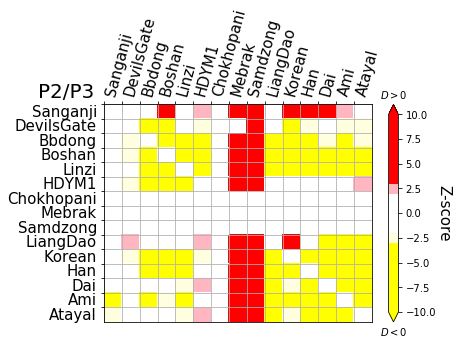

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors
import projmodules as pm
import numpy as np

eas=["Ulchi","Itelman","Oroqen","Daur","Hezhen","Japanese","Korean","Han","She","Tujia",
     "Miao","Dai","Kinh","Lahu","Naxi","Yi","Ami","Atayal"]
aneas=["Jomon","DevilsGate",'Bbdong','BoshanChineseNeolithic','Linzi','HDYM1','Chokhopani1',"Mebrak","Samdzong"]
eas=["LiangDaoChineseNeolithic","Korean","Han","Dai","Ami","Atayal"]

p1s,p2s = aneas+eas,aneas+eas

#p1s=aneas
#p2s=["LiangDaoChineseNeolithic"]+eas[::-1]

fh='UPA_all8'
pD='/mnt/solexa/mel_yang/coastal_neolithic/'
subset,tv,mypops=("Tianyuan_subaNWEAS_subaNWEAS_Mbuti",'all',"P2/P3")
subset,tv,mypops=("Chokhopani1_subaNWEAS_subaNWEAS_Mbuti",'all',"P2/P3")
#subset,tv,mypops=("subaNWEAS_subaNWEAS_Tianyuan_Mbuti",'all',"P1/P2")
#subset,tv,mypops=("Linzi_aNWEAS_SEASaSEAS_Mbuti",'all',"P2/P3")
fs=15
myfile = open(pD+fh+'.D.'+tv+'.'+subset+'.Zmat','r')
badindex='NA'
for ind,line in enumerate(myfile):
    x = line.strip().split()
    if ind==0:
        header1 = [i for i in x[1:] if i in p1s]
        if 'Pops' in header1: 
            badindex=header1.index('Pops')
            header1.remove('Pops')
        mydata,header2=[],[]
        continue
    if x[0] in p2s: header2.append(x[0])
    if badindex!='NA': del x[badindex+1]
    mywholedat=[float(i) if i != 'nan' else 0 for ind,i in enumerate(x[1:])]
    mydata.append([float(i) if i != 'nan' else 0 for ind,i in enumerate(x[1:])])
myary=np.array(mydata)
if "Jomon" in subset: 
    myary=myary[1:,1:]
    header1=header1[1:]
    header2=header2[1:]
replacer={}
replacer["BoshanChineseNeolithic"]="Boshan"
replacer["LiangDaoChineseNeolithic"]="LiangDao"
replacer["Chokhopani1"]="Chokhopani"
replacer["Jomon"]="Sanganji"
for i in replacer.keys():
    if i in header1: header1[header1.index(i)]=replacer[i]
    if i in header2: header2[header2.index(i)]=replacer[i]

levels = range(-10,11)

#levels=range(int(np.min(myary)), int(np.max(myary))+1)
multiplier=((len(levels)-6)/2)+1
colors = ['yellow']*multiplier + ['#FFFFE0'] + ['white']*4 + ['lightpink'] + ['red']*multiplier
print len(colors)
cmap1,norm = matplotlib.colors.from_levels_and_colors(levels, colors,extend='both')

##FIGURE

fig,ax = plt.subplots() #figsize=(15,15))
heatmap = ax.pcolor(myary,cmap=cmap1, vmin=-10,vmax=10)
cbar=plt.colorbar(heatmap)

##LEGEND
cbar.ax.text(.5, -0.1, '$D<0$', color='black', ha='center', va='center',fontsize=fs-5)
#cbar.ax.text(.5, 0.5, '$N.S.$', color='black', ha='center', va='center',fontsize=fs-5)
cbar.ax.text(.5, 1.1, '$D>0$', color='black', ha='center', va='center',fontsize=fs-5)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Z-score', rotation=270,fontsize=fs)
cbar.ax.set_yticks((-10,10),fontsize=fs)

ax.grid(True)
ax.set_xticks(np.arange(myary.shape[0]), minor=False)
ax.set_yticks(np.arange(myary.shape[1]), minor=False)

ax.xaxis.tick_top()

column_labels = header2
row_labels = header1
ax.set_xlim((0,myary.shape[0]))
ax.set_ylim((0,myary.shape[1]))
ax.set_xticklabels(column_labels, minor=False,fontsize=fs,rotation=75,ha='left')
ax.set_yticklabels(row_labels, minor=False,fontsize=fs,va='top')
ax.invert_yaxis()
#ax.text(-2.3,-0.5,mypops,fontsize=fs+5)
ax.text(-3.7,-0.5,mypops,fontsize=fs+5)

x=3
plt.savefig(pD+fh+'.D.'+subset+'.pdf',bbox_inches='tight')
#print myary
#plt.close()

## Coastal Connection?

['Xinyi', 'Xinyi_other', 'Daxi', 'LiangDaoChineseNeolithic', 'Atayal', 'Ami', 'Yi', 'Naxi', 'Lahu', 'Kinh', 'Dai', 'Miao', 'Tujia', 'She', 'Han', 'Korean', 'Japanese', 'Hezhen', 'Daur', 'Oroqen', 'Itelman', 'Ulchi']
[-0.04, -0.02, 0.0, 0.019999999999999997, 0.04, 0.060000000000000005]
['Xinyi', 'Xinyi_other', 'Daxi', 'LiangDaoChineseNeolithic', 'Atayal', 'Ami', 'Yi', 'Naxi', 'Lahu', 'Kinh', 'Dai', 'Miao', 'Tujia', 'She', 'Han', 'Korean', 'Japanese', 'Hezhen', 'Daur', 'Oroqen', 'Itelman', 'Ulchi']
[-0.04, -0.02, 0.0, 0.019999999999999997, 0.04, 0.060000000000000005]
['Xinyi', 'Xinyi_other', 'Daxi', 'LiangDaoChineseNeolithic', 'Atayal', 'Ami', 'Yi', 'Naxi', 'Lahu', 'Kinh', 'Dai', 'Miao', 'Tujia', 'She', 'Han', 'Korean', 'Japanese', 'Hezhen', 'Daur', 'Oroqen', 'Itelman', 'Ulchi']
[-0.04, -0.02, 0.0, 0.019999999999999997, 0.04, 0.060000000000000005]


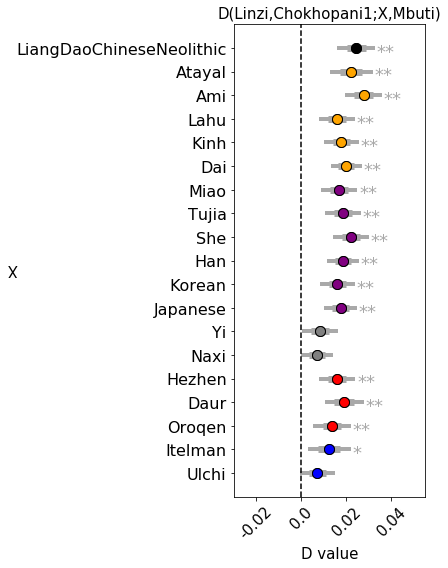

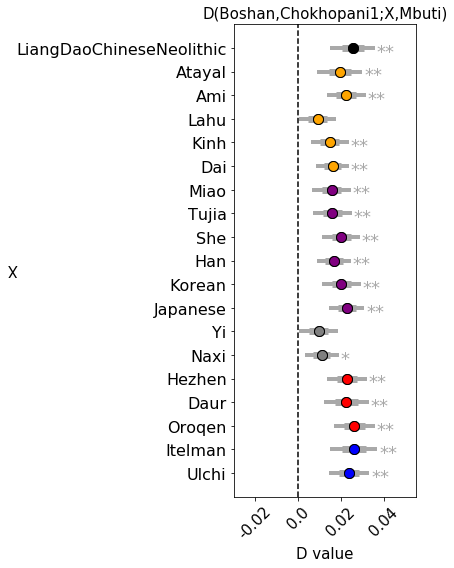

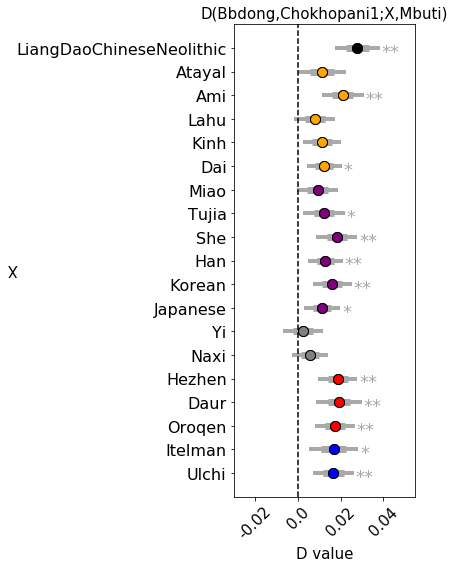

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
import plotting_funcs as pf



pD = "/mnt/solexa/mel_yang/coastal_neolithic/"
fhs = ["UPA_all8"]
outs = ['Mbuti']

eas=["Ulchi","Itelman","Oroqen","Daur","Hezhen","Naxi","Yi","Japanese","Korean","Han","She","Tujia",
     "Miao","Dai","Kinh","Lahu","Ami","Atayal"]+["LiangDaoChineseNeolithic"]

wantedpops = eas
wantedcolors = ['blue']*2+['red']*3+["gray"]*2+['purple']*6+["orange"]*5+["black"]
#wantedpops[-1] = 'Tianyuan'
mynames=wantedpops[:]
#mynames[mynames.index('LiangDaoChineseNeolithic')]='LiangDao'
fh="UPA_all8"
mytwoeurs = [['Chokhopani1'],]
for myeurs in mytwoeurs:
    for out in outs:
        for mymain in ["Linzi","BoshanChineseNeolithic","Bbdong"]:
            #mymain="Linzi"
            #mymain="BoshanChineseNeolithic"
            #mymain="Bbdong"
            myset = "%s_aNWEAS_SEASaSEAS_%s" % (mymain,out)
            mytitle=mymain
            if mymain=="BoshanChineseNeolithic": mytitle="Boshan"
            fig = plt.figure(figsize=(18,8))
            colors = ['red','blue','gray','black','orange']

            myxmins = [-0.03]*len(myeurs)
            myxmaxs = [0.055]*len(myeurs)
            mylabel = ['A','B','C','D','E']
            mylabellocation = [-0.11]*len(myeurs)

            for mysubplot,myeur in enumerate(myeurs):
                ax1=fig.add_subplot(1,5,mysubplot+1)

                mycond = True if 'tp' in myset else False
                myZary,mypops2,mypops1 = pf.mkDZary(pD+fh+".D.all."+myset+'.Zmat',mycond)
                myDary,mypops2,mypops1 = pf.mkDZary(pD+fh+".D.all."+myset+'.Dmat',mycond)
                myDary=np.transpose(myDary)
                myZary=np.transpose(myZary)
                mySEary=myDary/myZary
                print mypops2
                goodpops2 = [mypops2.index(i) for i in wantedpops]


                goodpops1 = mypops1.index(myeur)
                myys = np.array(range(len(goodpops2)))
                tyD = myDary[goodpops2,goodpops1]
                tySE = mySEary[goodpops2,goodpops1]
                tyZ = myZary[goodpops2,goodpops1]
                significant=[]
                for Z in tyZ: 
                    if abs(Z)>=2.5 and abs(Z)<3: significant.append('*')
                    elif abs(Z)>=3: significant.append('**')
                    else: significant.append("")
                
                for i in range(len(wantedpops)):
                    #print tyD[i]
                    ax1.errorbar(tyD[i],myys[i],xerr=tySE[i],color=wantedcolors[i],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
                    ax1.errorbar(tyD[i],myys[i],xerr=2*tySE[i],color=wantedcolors[i],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
                    ax1.plot(tyD[i],myys[i],'.')
                    ax1.text(tyD[i]+2*tySE[i]+offset,myys[i]-0.38,significant[i],fontsize=18,color="darkgrey")

                ax1.set_yticks(myys) #,rotation=45)
                if mysubplot==0:
                    ax1.set_yticklabels(mynames,fontsize=16)
                    ax1.set_ylabel("X",fontsize=15,rotation=180)
                    #ax1.text(-0.14,16.5,'Y',rotation = 0, fontsize=25)
                    #ax1.text(-0.125,26.5,'East/Southeast Asians',rotation = 90, fontsize=20)
                    #ax1.text(-0.13,6.5,'Native',rotation = 90, fontsize=20)
                    #ax1.text(-0.12,7.5,'Americans',rotation = 90, fontsize=20)

                    #ax1.text(0.13,20.5,mytwoeurs[0][0],rotation = 270, fontsize=20)
                    #ax1.text(0.15,16.5,'X',rotation = 0, fontsize=25)
                else: 
                    ax1.set_yticklabels(['']*len(wantedpops),fontsize=17)


                ax1.set_ylim(-1,len(goodpops2))
                ax1.set_xlim(myxmins[mysubplot],myxmaxs[mysubplot])

                xlabel = ax1.get_xticks().tolist()
                print xlabel
                ax1.set_xticklabels(xlabel,rotation=45,fontsize=15)

                ax1.set_title("D(%s,%s;X,Mbuti)" % (mytitle,myeurs[0]),fontsize=15)
                #ax1.axvline(x=0, ls='solid', c='gray',alpha=0.3)
                ax1.axvline(x=0, ls='dashed', c='black')
                #ax1.axhline(y=30.5, ls='solid', c='black',alpha=0.5)
                #ax1.axhline(y=9.5, ls='solid', c='black',alpha=0.5)
                ax1.set_xlabel("D value",fontsize=15)

            fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=None)
            plt.tight_layout()
            plt.savefig(pD+fh+'.Dfig.D_%s_%s_X_Mbuti.pdf' % (mytitle,myeurs[0]),bbox_inches='tight')

            



['Xinyi', 'Xinyi_other', 'Daxi', 'LiangDaoChineseNeolithic', 'Daur', 'Hezhen', 'Naxi', 'Oroqen', 'Ulchi', 'Xibo', 'Dai', 'Dong', 'Gelao', 'Lahu', 'Li', 'Maonan', 'Miao', 'Mulam', 'She', 'Tujia', 'Yi', 'Zhuang', 'Cambodian', 'Han_Chongqing', 'Han_Fujian', 'Han_Guandong', 'Han_Henan', 'Han_HGDP', 'Han_Hubei', 'Han_Jiangsu', 'Han_NChina', 'Han_Shandong', 'Han_Shanghai', 'Han_Shanxi', 'Han_Sichuan', 'Han_Zhejiang', 'Kinh_Vietnam_KHV', 'Korean', 'Thai', 'Qiang_Horpa', 'Tibetan_Chamdo', 'Tibetan_Gangcha', 'Tibetan_Gannan', 'Tibetan_Lhasa', 'Tibetan_Nagqu', 'Tibetan_Shannan', 'Tibetan_Shigatse', 'Tibetan_Xinlong', 'Tibetan_Xunhua', 'Tibetan_Yajiang', 'Japanese', 'Ami_Stoneking', 'Atayal_Stoneking', 'Tu', 'Dongxiang', 'Kyrgyz_China', 'Kyrgyz', 'Kazakh_China', 'Kazakh', 'Uygur', 'Mongol', 'Tibetan_Yunnan', 'Bunun', 'Tao', 'Burmese', 'Vietnamese', 'Paiwan', 'Rukai', 'Hakka', 'Minnan', 'Pingpu', 'Atayal_Coriell', 'Ami_Coriell', 'Bonan', 'Yugur_Eastern', 'Yugur_Western', 'Salar', 'Malay', 'Malayan

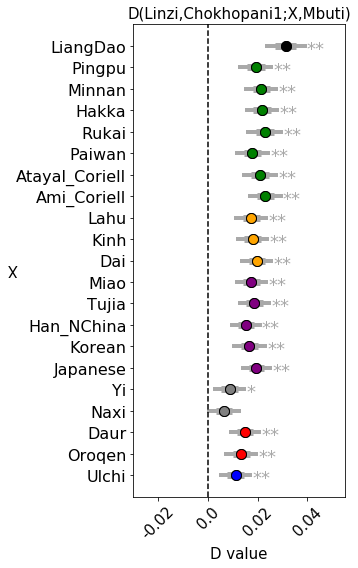

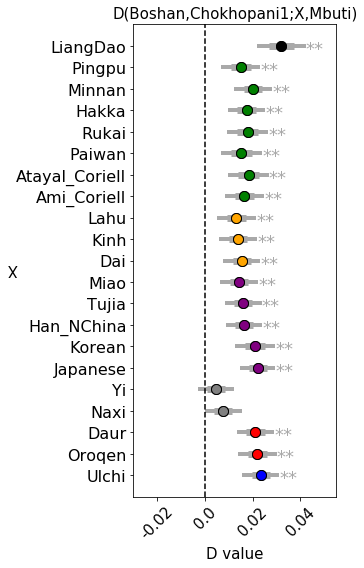

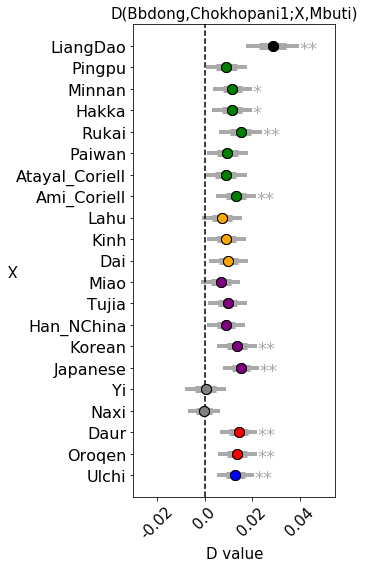

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
import plotting_funcs as pf

pD = "/mnt/solexa/mel_yang/coastal_neolithic/"
fhs = ["ind_A_v13_TBH6"]
outs = ['Mbuti']

eas=["Ulchi","Oroqen","Daur","Naxi","Yi","Japanese","Korean","Han_NChina","Tujia",
     "Miao","Dai","Kinh_Vietnam_KHV","Lahu","Ami_Coriell","Atayal_Coriell","Paiwan","Rukai","Hakka","Minnan","Pingpu"]+["LiangDaoChineseNeolithic"]

wantedpops = eas
wantedcolors = ['blue']*1+['red']*2+["gray"]*2+['purple']*5+["orange"]*3+["green"]*7+["black"]
#wantedpops[-1] = 'Tianyuan'
mynames=wantedpops[:]
mynames[mynames.index('LiangDaoChineseNeolithic')]='LiangDao'
mynames[mynames.index('Kinh_Vietnam_KHV')]='Kinh'
fh="ind_A_v13_TBH6"
mytwoeurs = [['Chokhopani1'],]
for myeurs in mytwoeurs:
    for out in outs:
        for mymain in ["Linzi","BoshanChineseNeolithic","Bbdong"]:
            #mymain="Linzi"
            #mymain="BoshanChineseNeolithic"
            #mymain="Bbdong"
            myset = "%s_aNWEAS_EASaSEAS_%s" % (mymain,out)
            mytitle=mymain
            if mymain=="BoshanChineseNeolithic": mytitle="Boshan"
            fig = plt.figure(figsize=(18,8))
            colors = ['red','blue','gray','black','orange']

            myxmins = [-0.03]*len(myeurs)
            myxmaxs = [0.055]*len(myeurs)
            offset=(myxmaxs[0]-myxmins[0])/700.0
            mylabel = ['A','B','C','D','E']
            mylabellocation = [-0.11]*len(myeurs)

            for mysubplot,myeur in enumerate(myeurs):
                ax1=fig.add_subplot(1,5,mysubplot+1)

                mycond = True if 'tp' in myset else False
                myZary,mypops2,mypops1 = pf.mkDZary(pD+fh+".D.all."+myset+'.Zmat',mycond)
                myDary,mypops2,mypops1 = pf.mkDZary(pD+fh+".D.all."+myset+'.Dmat',mycond)
                myDary=np.transpose(myDary)
                myZary=np.transpose(myZary)
                mySEary=myDary/myZary
                print mypops2
                goodpops2 = [mypops2.index(i) for i in wantedpops]

    
                goodpops1 = mypops1.index(myeur)
                myys = np.array(range(len(goodpops2)))
                tyD = myDary[goodpops2,goodpops1]
                tySE = mySEary[goodpops2,goodpops1]
                tyZ = myZary[goodpops2,goodpops1]
                
                significant=[]
                for Z in tyZ: 
                    if abs(Z)>=2.5 and abs(Z)<3: significant.append('*')
                    elif abs(Z)>=3: significant.append('**')
                    else: significant.append("")
                        
                for i in range(len(wantedpops)):
                    #print tyD[i]
                    ax1.errorbar(tyD[i],myys[i],xerr=tySE[i],color=wantedcolors[i],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
                    ax1.errorbar(tyD[i],myys[i],xerr=2*tySE[i],color=wantedcolors[i],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
                    ax1.plot(tyD[i],myys[i],'.')
                    ax1.set_yticks(myys) #,rotation=45)
                    ax1.text(tyD[i]+2*tySE[i]+offset,myys[i]-0.38,significant[i],fontsize=18,color="darkgrey")
                if mysubplot==0:
                    ax1.set_yticklabels(mynames,fontsize=16)
                    ax1.set_ylabel("X",fontsize=15,rotation=180)
                    #ax1.text(-0.14,16.5,'Y',rotation = 0, fontsize=25)
                    #ax1.text(-0.125,26.5,'East/Southeast Asians',rotation = 90, fontsize=20)
                    #ax1.text(-0.13,6.5,'Native',rotation = 90, fontsize=20)
                    #ax1.text(-0.12,7.5,'Americans',rotation = 90, fontsize=20)

                    #ax1.text(0.13,20.5,mytwoeurs[0][0],rotation = 270, fontsize=20)
                    #ax1.text(0.15,16.5,'X',rotation = 0, fontsize=25)
                else: 
                    ax1.set_yticklabels(['']*len(wantedpops),fontsize=17)

                ax1.set_ylim(-1,len(goodpops2))
                ax1.set_xlim(myxmins[mysubplot],myxmaxs[mysubplot])

                xlabel = ax1.get_xticks().tolist()
                print xlabel
                ax1.set_xticklabels(xlabel,rotation=45,fontsize=15)

                ax1.set_title("D(%s,%s;X,Mbuti)" % (mytitle,myeurs[0]),fontsize=15)
                #ax1.axvline(x=0, ls='solid', c='gray',alpha=0.3)
                ax1.axvline(x=0, ls='dashed', c='black')
                #ax1.axhline(y=30.5, ls='solid', c='black',alpha=0.5)
                #ax1.axhline(y=9.5, ls='solid', c='black',alpha=0.5)
                ax1.set_xlabel("D value",fontsize=15)

            fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=None)
            plt.tight_layout()
            plt.savefig(pD+fh+'.Dfig.D_%s_%s_X_Mbuti.pdf' % (mytitle,myeurs[0]),bbox_inches='tight')

            



In [1]:
abs(-3)

3

## Siberian Connection?

[-0.05, -0.025, 0.0, 0.02500000000000001, 0.05, 0.075]


/home/mel_yang/.local/lib/python2.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in divide


[-0.05, -0.025, 0.0, 0.02500000000000001, 0.05, 0.075]
[-0.05, -0.025, 0.0, 0.02500000000000001, 0.05, 0.075]
[-0.05, -0.025, 0.0, 0.02500000000000001, 0.05, 0.075]
[-0.05, -0.025, 0.0, 0.02500000000000001, 0.05, 0.075]
[-0.05, -0.025, 0.0, 0.02500000000000001, 0.05, 0.075]


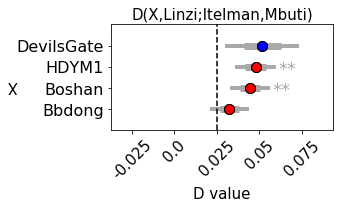

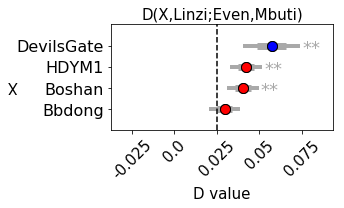

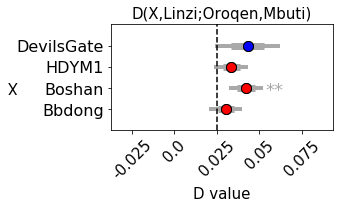

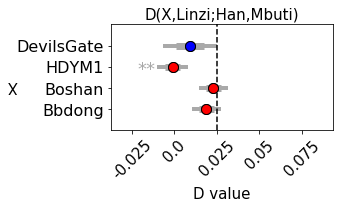

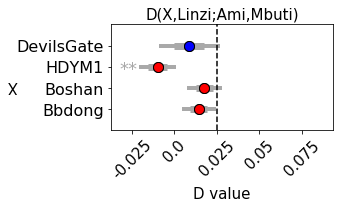

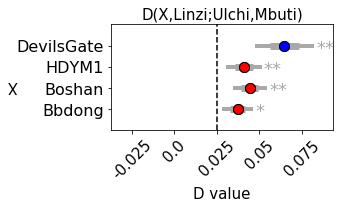

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
import plotting_funcs as pf



pD = "/mnt/solexa/mel_yang/coastal_neolithic/"
fhs = ["UPA_all8"]
outs = ['Mbuti']

wantedpops = ['Bbdong','BoshanChineseNeolithic','Linzi','HDYM1',"DevilsGate",]
wantedcolors = ['red']*4+['blue']

#wantedpops = ['Bbdong','BoshanChineseNeolithic','Linzi','HDYM1',"DevilsGate",]
#wantedcolors = ['red']*4+['blue']
#wantedpops = ['Bbdong','BoshanChineseNeolithic','Linzi',"DevilsGate"] #,'Jomon']
#wantedcolors = ['red']*3+['blue']+['yellow']
wantedpops = ['Bbdong','BoshanChineseNeolithic','HDYM1',"DevilsGate",]
wantedcolors = ['red']*3+['blue']
#wantedpops[-1] = 'Tianyuan'
mynames=wantedpops[:]
if "BoshanChineseNeolithic" in mynames: mynames[mynames.index('BoshanChineseNeolithic')]='Boshan'
fh="UPA_all8"
#mytwoeurs = [['Chokhopani1'],]
#mytwoeurs = [['HDYM1'],]
mytwoeurs = [['Linzi'],]
for myeurs in mytwoeurs:
    for out in outs:
        for mymain in ["Itelman","Even","Oroqen","Han","Ami","Ulchi"]: #["Han","Ami"] : #
            #mymain="Linzi"
            #mymain="BoshanChineseNeolithic"
            #mymain="Bbdong"
            myset = "subaNWEAS_subaNWEAS_%s_%s" % (mymain,out)
            mytitle=mymain
            if mymain=="BoshanChineseNeolithic": mytitle="Boshan"
            fig = plt.figure(figsize=(18,3))
            colors = ['red','blue','gray','black','orange']

            myxmins = [-0.05]*len(myeurs)
            myxmaxs = [0.055]*len(myeurs)
            #myxmins = [-0.03]*len(myeurs)
            #myxmaxs = [0.075]*len(myeurs)
            offset=(myxmaxs[0]-myxmins[0])/100.0
            mylabel = ['A','B','C','D','E']
            mylabellocation = [-0.11]*len(myeurs)
        
            for mysubplot,myeur in enumerate(myeurs):
                ax1=fig.add_subplot(1,5,mysubplot+1)

                mycond = True if 'tp' in myset else False
                myZary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D.all."+myset+'.Zmat',mycond)
                myDary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D.all."+myset+'.Dmat',mycond)
                mySEary=myDary/myZary
                #print mypops2
                goodpops2 = [mypops2.index(i) for i in wantedpops]


                goodpops1 = mypops1.index(myeur)
                myys = np.array(range(len(goodpops2)))
                tyD = myDary[goodpops2,goodpops1]
                tySE = mySEary[goodpops2,goodpops1]
                tyZ = myZary[goodpops2,goodpops1]
                significant=[]
                for Z in tyZ: 
                    if abs(Z)>=2.5 and abs(Z)<3: significant.append('*')
                    elif abs(Z)>=3: significant.append('**')
                    else: significant.append("")
                
                for i in range(len(wantedpops)):
                    #print tyD[i]
                    ax1.errorbar(tyD[i],myys[i],xerr=tySE[i],color=wantedcolors[i],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
                    ax1.errorbar(tyD[i],myys[i],xerr=2*tySE[i],color=wantedcolors[i],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
                    ax1.plot(tyD[i],myys[i],'.')
                    if tyD[i]<0: 
                        switch=-(2*tySE[i]+9*offset)
                    else: switch=2*tySE[i]+offset
                    
                    ax1.text(tyD[i]+switch,myys[i]-0.36,significant[i],fontsize=18,color="darkgrey")
                    
                ax1.set_yticks(myys) #,rotation=45)
                if mysubplot==0:
                    ax1.set_yticklabels(mynames,fontsize=16)
                    ax1.set_ylabel("X",fontsize=15,rotation=180)
                    #ax1.text(-0.14,16.5,'Y',rotation = 0, fontsize=25)
                    #ax1.text(-0.125,26.5,'East/Southeast Asians',rotation = 90, fontsize=20)
                    #ax1.text(-0.13,6.5,'Native',rotation = 90, fontsize=20)
                    #ax1.text(-0.12,7.5,'Americans',rotation = 90, fontsize=20)

                    #ax1.text(0.13,20.5,mytwoeurs[0][0],rotation = 270, fontsize=20)
                    #ax1.text(0.15,16.5,'X',rotation = 0, fontsize=25)
                else: 
                    ax1.set_yticklabels(['']*len(wantedpops),fontsize=17)


                ax1.set_ylim(-1,len(goodpops2))
                ax1.set_xlim(myxmins[mysubplot],myxmaxs[mysubplot])

                xlabel = ax1.get_xticks().tolist()
                print xlabel
                ax1.set_xticklabels(xlabel,rotation=45,fontsize=15)
                if myeurs[0]=="BoshanChineseNeolithic":
                    ax1.set_title("D(X,Boshan;%s,Mbuti)" % (mytitle),fontsize=15)
                else: ax1.set_title("D(X,%s;%s,Mbuti)" % (myeurs[0],mytitle),fontsize=15)
                #ax1.axvline(x=0, ls='solid', c='gray',alpha=0.3)
                ax1.axvline(x=0, ls='dashed', c='black')
                #ax1.axhline(y=30.5, ls='solid', c='black',alpha=0.5)
                #ax1.axhline(y=9.5, ls='solid', c='black',alpha=0.5)
                ax1.set_xlabel("D value",fontsize=15)

            fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=None)
            plt.tight_layout()
            plt.savefig(pD+fh+'.Dfig.D_X_%s_%s_Mbuti.pdf' % (myeurs[0],mytitle),bbox_inches='tight')
            

